In [1]:
import pandas as pd

df = pd.read_csv("combined_loan_application_repayment_behavior (1).csv")

# Quick preview
df.head(14)

,Applicant_ID,Month,Monthly_Income,Annual_Income,Employment_Status,House_Status,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,...,Loan_Amount_Requested_x,Loan_Term_x,Purpose,Approval_Status,Loan_Amount_Requested_y,Loan_Term_y,Interest_Rate,Monthly_Payment,Defaulted,Number_of_Delinquencies
0,1,1,5183.323695,68000,part time,Own,8,59,72,15,...,NaN,NaN,NaN,NaN,12116.231100,9,0.14,2449.518859,0,1
1,1,2,5303.792402,68000,part time,Own,8,59,72,15,...,NaN,NaN,NaN,NaN,12116.231100,9,0.14,2449.518859,0,1
2,1,3,5952.849727,68000,part time,Own,8,59,72,15,...,NaN,NaN,NaN,NaN,12116.231100,9,0.14,2449.518859,0,1
3,1,4,5817.215818,68000,part time,Own,8,59,72,15,...,NaN,NaN,NaN,NaN,12116.231100,9,0.14,2449.518859,0,1
4,1,5,5265.616072,68000,part time,Own,8,59,72,15,...,NaN,NaN,NaN,NaN,12116.231100,9,0.14,2449.518859,0,1
5,1,6,5291.345165,68000,part time,Own,8,59,72,15,...,NaN,NaN,NaN,NaN,12116.231100,9,0.14,2449.518859,0,1
6,1,7,5528.012292,68000,part time,Own,8,59,72,15,...,NaN,NaN,NaN,NaN,12116.231100,9,0.14,2449.518859,0,1
7,1,8,5468.561246,68000,part time,Own,8,59,72,15,...,NaN,NaN,NaN,NaN,12116.231100,9,0.14,2449.518859,0,1
8,1,9,5962.952550,68000,part time,Own,8,59,72,15,...,NaN,NaN,NaN,NaN,12116.231100,9,0.14,2449.518859,0,1
9,1,10,6135.158186,68000,part time,Own,8,59,72,15,...,NaN,NaN,NaN,NaN,12116.231100,9,0.14,2449.518859,0,1


In [2]:
import pandas as pd

# Load the original dataset (if not already loaded)
df = pd.read_csv("combined_loan_application_repayment_behavior (1).csv")

# Step 1: Define aggregation rules per applicant
aggregation = {
    'Monthly_Income': 'sum',  # Total income over 12 months
    'Annual_Income': 'first',
    'Employment_Status': 'first',
    'House_Status': 'first',
    'Employment_History_Years': 'first',
    'Online_Spending_Behavior_Score': 'first',
    'Utility_Bill_Payment_Score': 'first',
    'Number_of_Open_Accounts': 'first',
    'Credit_History_Years': 'first',
    'Food_Expense': 'sum',
    'Transportation_Expense': 'sum',
    'Home_Utility_Expense': 'sum',
    'Shopping_Expense': 'sum',
    'Environmental_Spending': 'sum',
    'Loan_Amount_Requested_y': 'first',
    'Loan_Term_y': 'first',
    'Interest_Rate': 'first',
    'Monthly_Payment': 'sum',
    'Defaulted': 'max',  # If defaulted in any month, count as defaulted
    'Number_of_Delinquencies': 'max',
    'Purpose': 'first',
    'Approval_Status': 'first'
}

# Step 2: Group by Applicant_ID and apply aggregation
df_cleaned = df.groupby('Applicant_ID').agg(aggregation).reset_index()

# Step 3: Rename Monthly_Income to Total_Income
df_cleaned.rename(columns={'Monthly_Income': 'Total_Income'}, inplace=True)

# Step 4: Save cleaned data if needed
# df_cleaned.to_csv("cleaned_applicant_data.csv", index=False)

# Preview cleaned data
df_cleaned.head()


,Applicant_ID,Total_Income,Annual_Income,Employment_Status,House_Status,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,Credit_History_Years,...,Shopping_Expense,Environmental_Spending,Loan_Amount_Requested_y,Loan_Term_y,Interest_Rate,Monthly_Payment,Defaulted,Number_of_Delinquencies,Purpose,Approval_Status
0,1,67598.809998,68000,part time,Own,8,59,72,15,6,...,9952.294934,2365.653810,12116.231100,9,0.14,29394.226308,0,1,Medical Expenses,Approved
1,3,44241.311516,44000,part time,Own,10,11,32,8,5,...,7764.066150,1489.910640,2970.974279,7,0.09,7083.652979,0,5,Home Improvement,Approved
2,4,92011.452489,93000,full time,Own,3,65,67,6,19,...,14777.324041,3211.333038,3888.147185,24,0.14,6826.163736,1,2,Home Improvement,Approved
3,6,68323.547502,68000,part time,Own,11,9,53,13,9,...,10279.373017,2136.014161,10955.281890,7,0.10,27003.301824,0,1,Home Improvement,Approved
4,7,66097.959448,66000,part time,Rented,5,85,5,11,5,...,11162.834116,1964.187212,10924.348420,18,0.10,15984.098772,0,2,Major Purchase,Approved


In [3]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Applicant_ID                    400 non-null    int64  
 1   Total_Income                    400 non-null    float64
 2   Annual_Income                   400 non-null    int64  
 3   Employment_Status               400 non-null    object 
 4   House_Status                    400 non-null    object 
 5   Employment_History_Years        400 non-null    int64  
 6   Online_Spending_Behavior_Score  400 non-null    int64  
 7   Utility_Bill_Payment_Score      400 non-null    int64  
 8   Number_of_Open_Accounts         400 non-null    int64  
 9   Credit_History_Years            400 non-null    int64  
 10  Food_Expense                    400 non-null    float64
 11  Transportation_Expense          400 non-null    float64
 12  Home_Utility_Expense            400 

In [4]:
df_cleaned.drop(columns=['Annual_Income'], inplace=True)


In [5]:
df_cleaned.rename(columns={'Monthly_Payment': 'Total_Payment'}, inplace=True)

In [6]:
descriptive_Statistics_2= df_cleaned.describe()
print (descriptive_Statistics_2)

       Applicant_ID   Total_Income  Employment_History_Years  \
count    400.000000     400.000000                400.000000   
mean     487.590000   60544.172133                 11.017500   
std      288.798743   23167.359721                  5.784535   
min        1.000000   20158.165815                  1.000000   
25%      250.750000   41511.746853                  6.000000   
50%      500.500000   59949.983700                 11.500000   
75%      750.250000   81178.777545                 16.000000   
max     1000.000000  102080.835147                 20.000000   

       Online_Spending_Behavior_Score  Utility_Bill_Payment_Score  \
count                      400.000000                  400.000000   
mean                        48.937500                   49.022500   
std                         30.497275                   28.986593   
min                          0.000000                    0.000000   
25%                         22.000000                   24.000000   
50%      

In [7]:
df_2= descriptive_Statistics_2
df_2.to_excel('descriptive_Statistics_2.xlsx', index=False)

In [8]:
import pandas as pd

# Assuming df_cleaned is your DataFrame
df_binned = df_cleaned.copy()

# Define bin edges based on quartiles
bin_labels = ['Low', 'Medium', 'High']

# Binning Employment_History_Years
df_binned['Employment_History_Bin'] = pd.cut(
    df_binned['Employment_History_Years'],
    bins=[0, 6, 16, df_binned['Employment_History_Years'].max()],
    labels=bin_labels,
    include_lowest=True
)

# Binning Online_Spending_Behavior_Score
df_binned['Online_Spending_Behavior_Bin'] = pd.cut(
    df_binned['Online_Spending_Behavior_Score'],
    bins=[0, 22, 78, df_binned['Online_Spending_Behavior_Score'].max()],
    labels=bin_labels,
    include_lowest=True
)

# Binning Utility_Bill_Payment_Score
df_binned['Utility_Bill_Payment_Bin'] = pd.cut(
    df_binned['Utility_Bill_Payment_Score'],
    bins=[0, 24, 73, df_binned['Utility_Bill_Payment_Score'].max()],
    labels=bin_labels,
    include_lowest=True
)

# Binning Number_of_Open_Accounts
df_binned['Open_Accounts_Bin'] = pd.cut(
    df_binned['Number_of_Open_Accounts'],
    bins=[0, 4, 11, df_binned['Number_of_Open_Accounts'].max()],
    labels=bin_labels,
    include_lowest=True
)

# Binning Credit_History_Years
df_binned['Credit_History_Bin'] = pd.cut(
    df_binned['Credit_History_Years'],
    bins=[0, 5, 15, df_binned['Credit_History_Years'].max()],
    labels=bin_labels,
    include_lowest=True
)


In [10]:
df_binned.head()

,Applicant_ID,Total_Income,Employment_Status,House_Status,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,Credit_History_Years,Food_Expense,...,Total_Payment,Defaulted,Number_of_Delinquencies,Purpose,Approval_Status,Employment_History_Bin,Online_Spending_Behavior_Bin,Utility_Bill_Payment_Bin,Open_Accounts_Bin,Credit_History_Bin
0,1,67598.809998,part time,Own,8,59,72,15,6,13781.757853,...,29394.226308,0,1,Medical Expenses,Approved,Medium,Medium,Medium,High,Medium
1,3,44241.311516,part time,Own,10,11,32,8,5,8592.258891,...,7083.652979,0,5,Home Improvement,Approved,Medium,Low,Medium,Medium,Low
2,4,92011.452489,full time,Own,3,65,67,6,19,18910.978164,...,6826.163736,1,2,Home Improvement,Approved,Low,Medium,Medium,Medium,High
3,6,68323.547502,part time,Own,11,9,53,13,9,13951.805893,...,27003.301824,0,1,Home Improvement,Approved,Medium,Low,Medium,High,Medium
4,7,66097.959448,part time,Rented,5,85,5,11,5,12683.481494,...,15984.098772,0,2,Major Purchase,Approved,Low,High,Low,Medium,Low


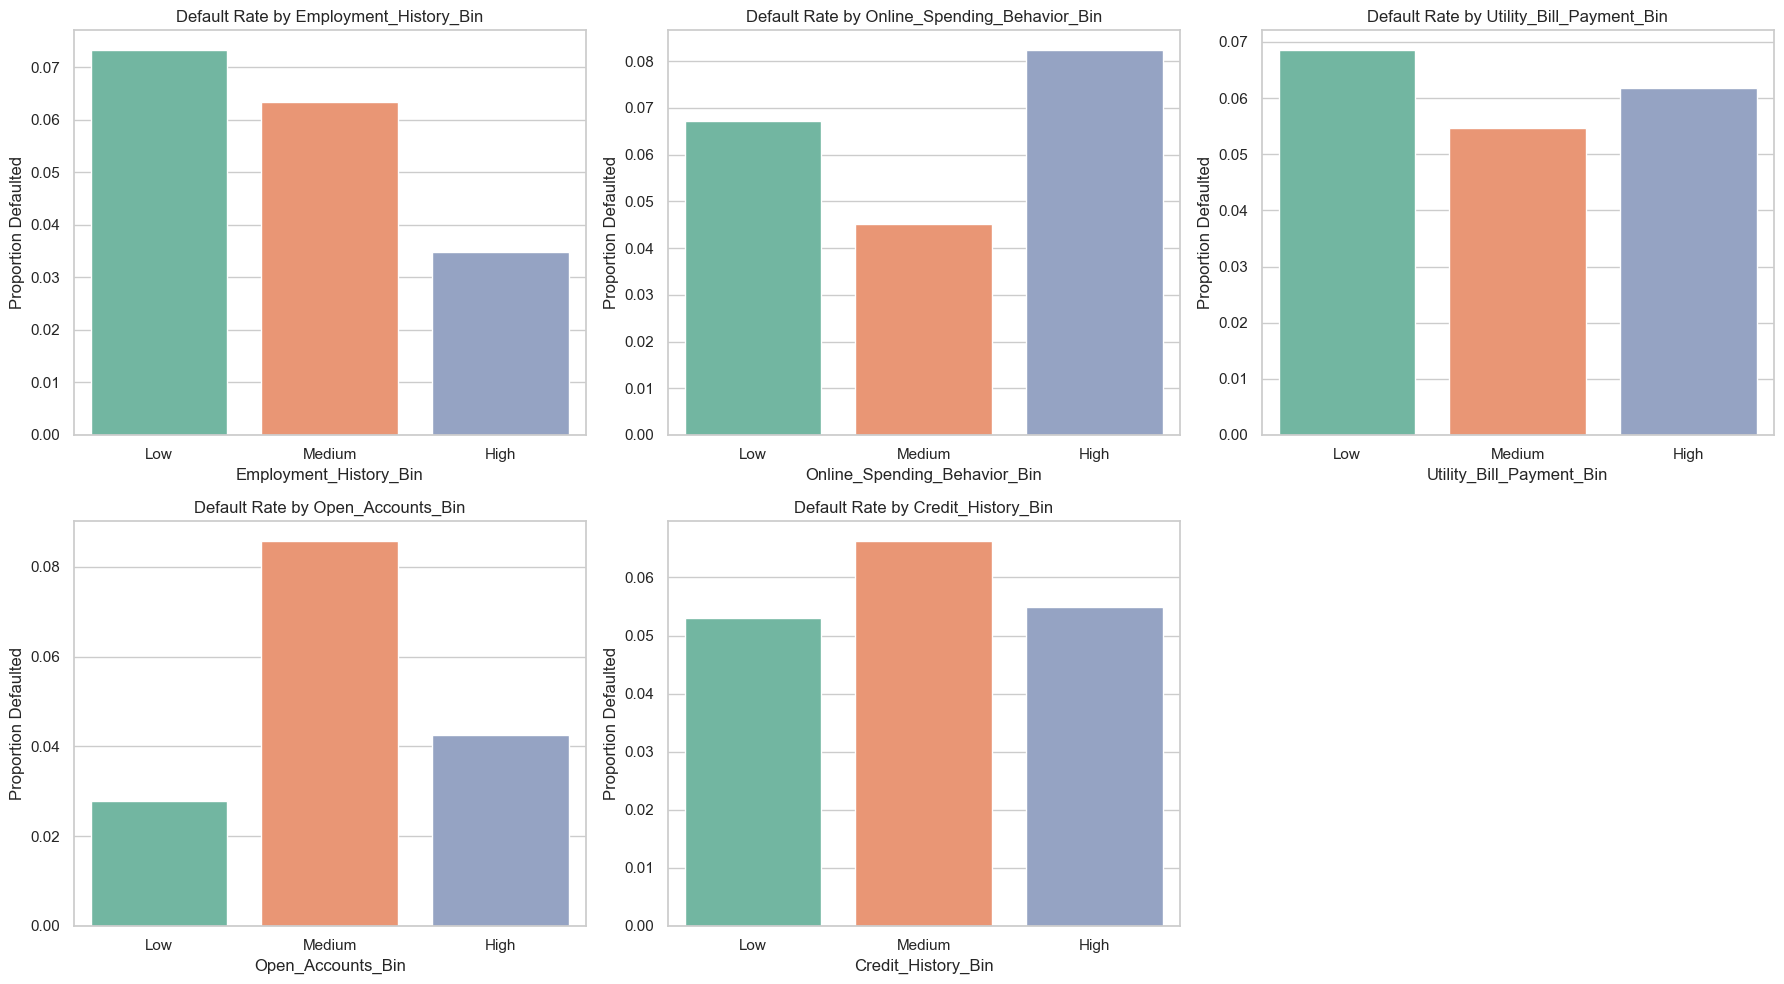

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of binned variables
binned_vars = [
    'Employment_History_Bin',
    'Online_Spending_Behavior_Bin',
    'Utility_Bill_Payment_Bin',
    'Open_Accounts_Bin',
    'Credit_History_Bin'
]

# Set the overall style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Generate bar plots
for i, var in enumerate(binned_vars):
    # Calculate the proportion of defaults in each category
    prop_df = df_binned.groupby(var)['Defaulted'].mean().reset_index()
    sns.barplot(x=var, y='Defaulted', data=prop_df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Default Rate by {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Proportion Defaulted')

# Remove any unused subplots
for j in range(len(binned_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Frequency distribution for Employment_Status:
Employment_Status
full time    2520
part time    2280
Name: count, dtype: int64

--------------------------------------------------

Frequency distribution for House_Status:
House_Status
Own       2400
Rented    2400
Name: count, dtype: int64

--------------------------------------------------

Frequency distribution for Purpose:
Purpose
Home Improvement      116
Medical Expenses      108
Debt Consolidation    100
Major Purchase         76
Name: count, dtype: int64

--------------------------------------------------

Frequency distribution for Approval_Status:
Approval_Status
Approved    400
Name: count, dtype: int64

--------------------------------------------------



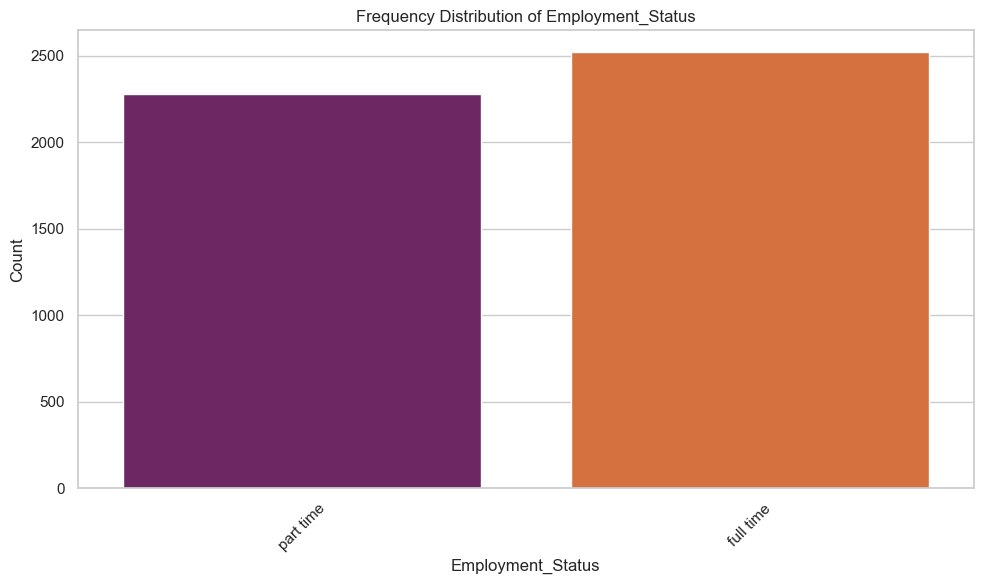

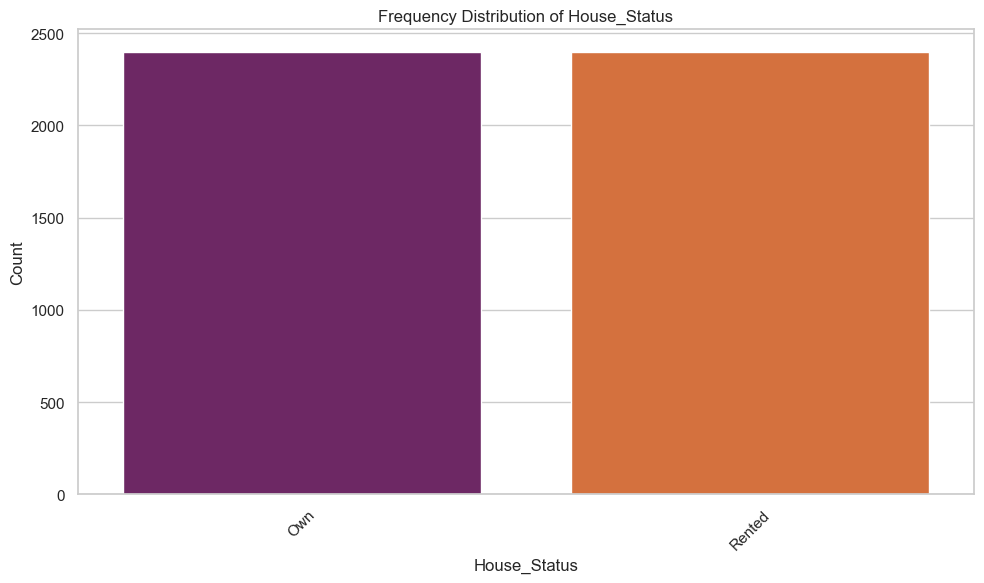

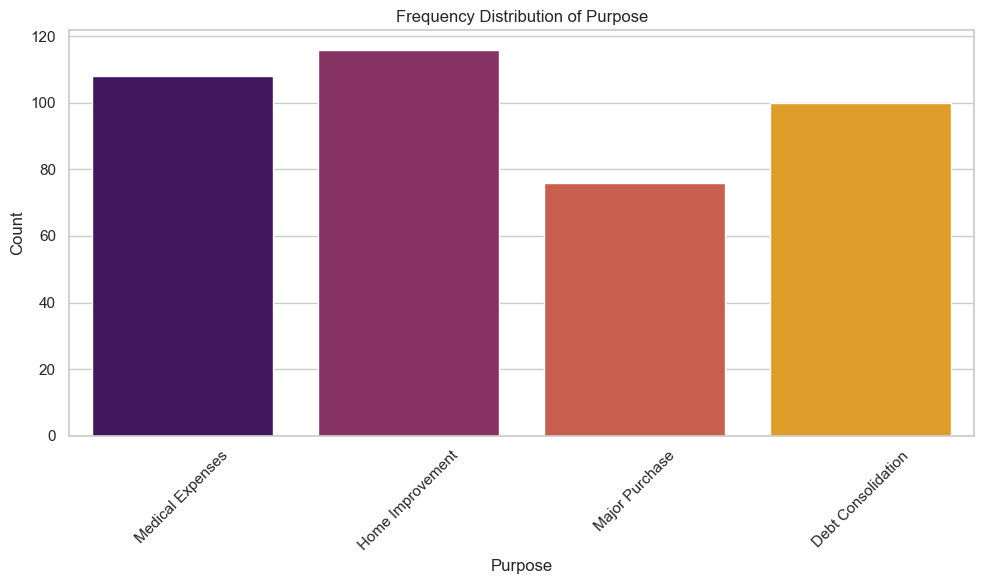

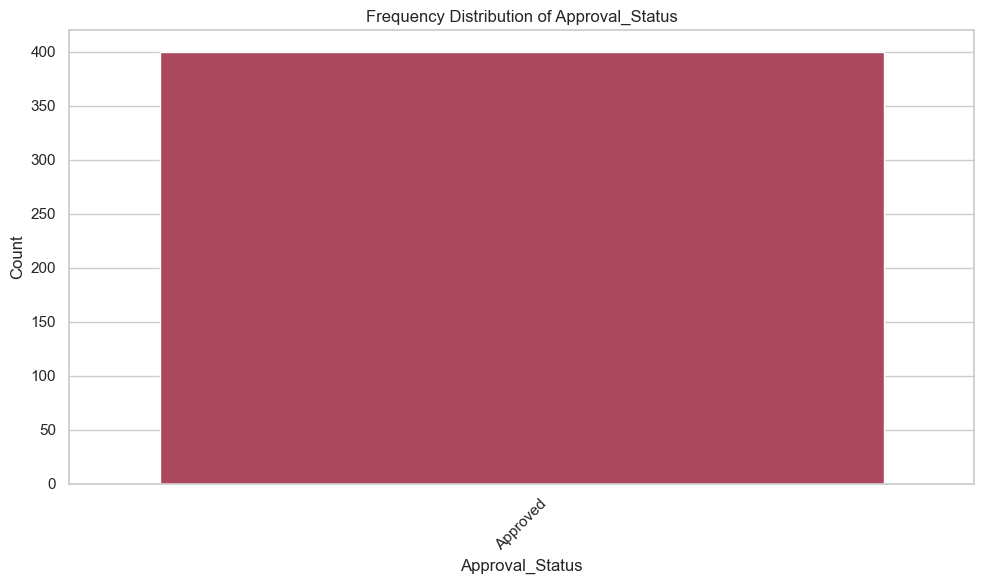

In [12]:
# Plot bar plots for each categorical variable
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()

# Loop through each categorical column
for col in categorical_cols:
    print(f"Frequency distribution for {col}:")
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")

for col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, data=df, palette="inferno")
    plt.title(f"Frequency Distribution of {col}")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


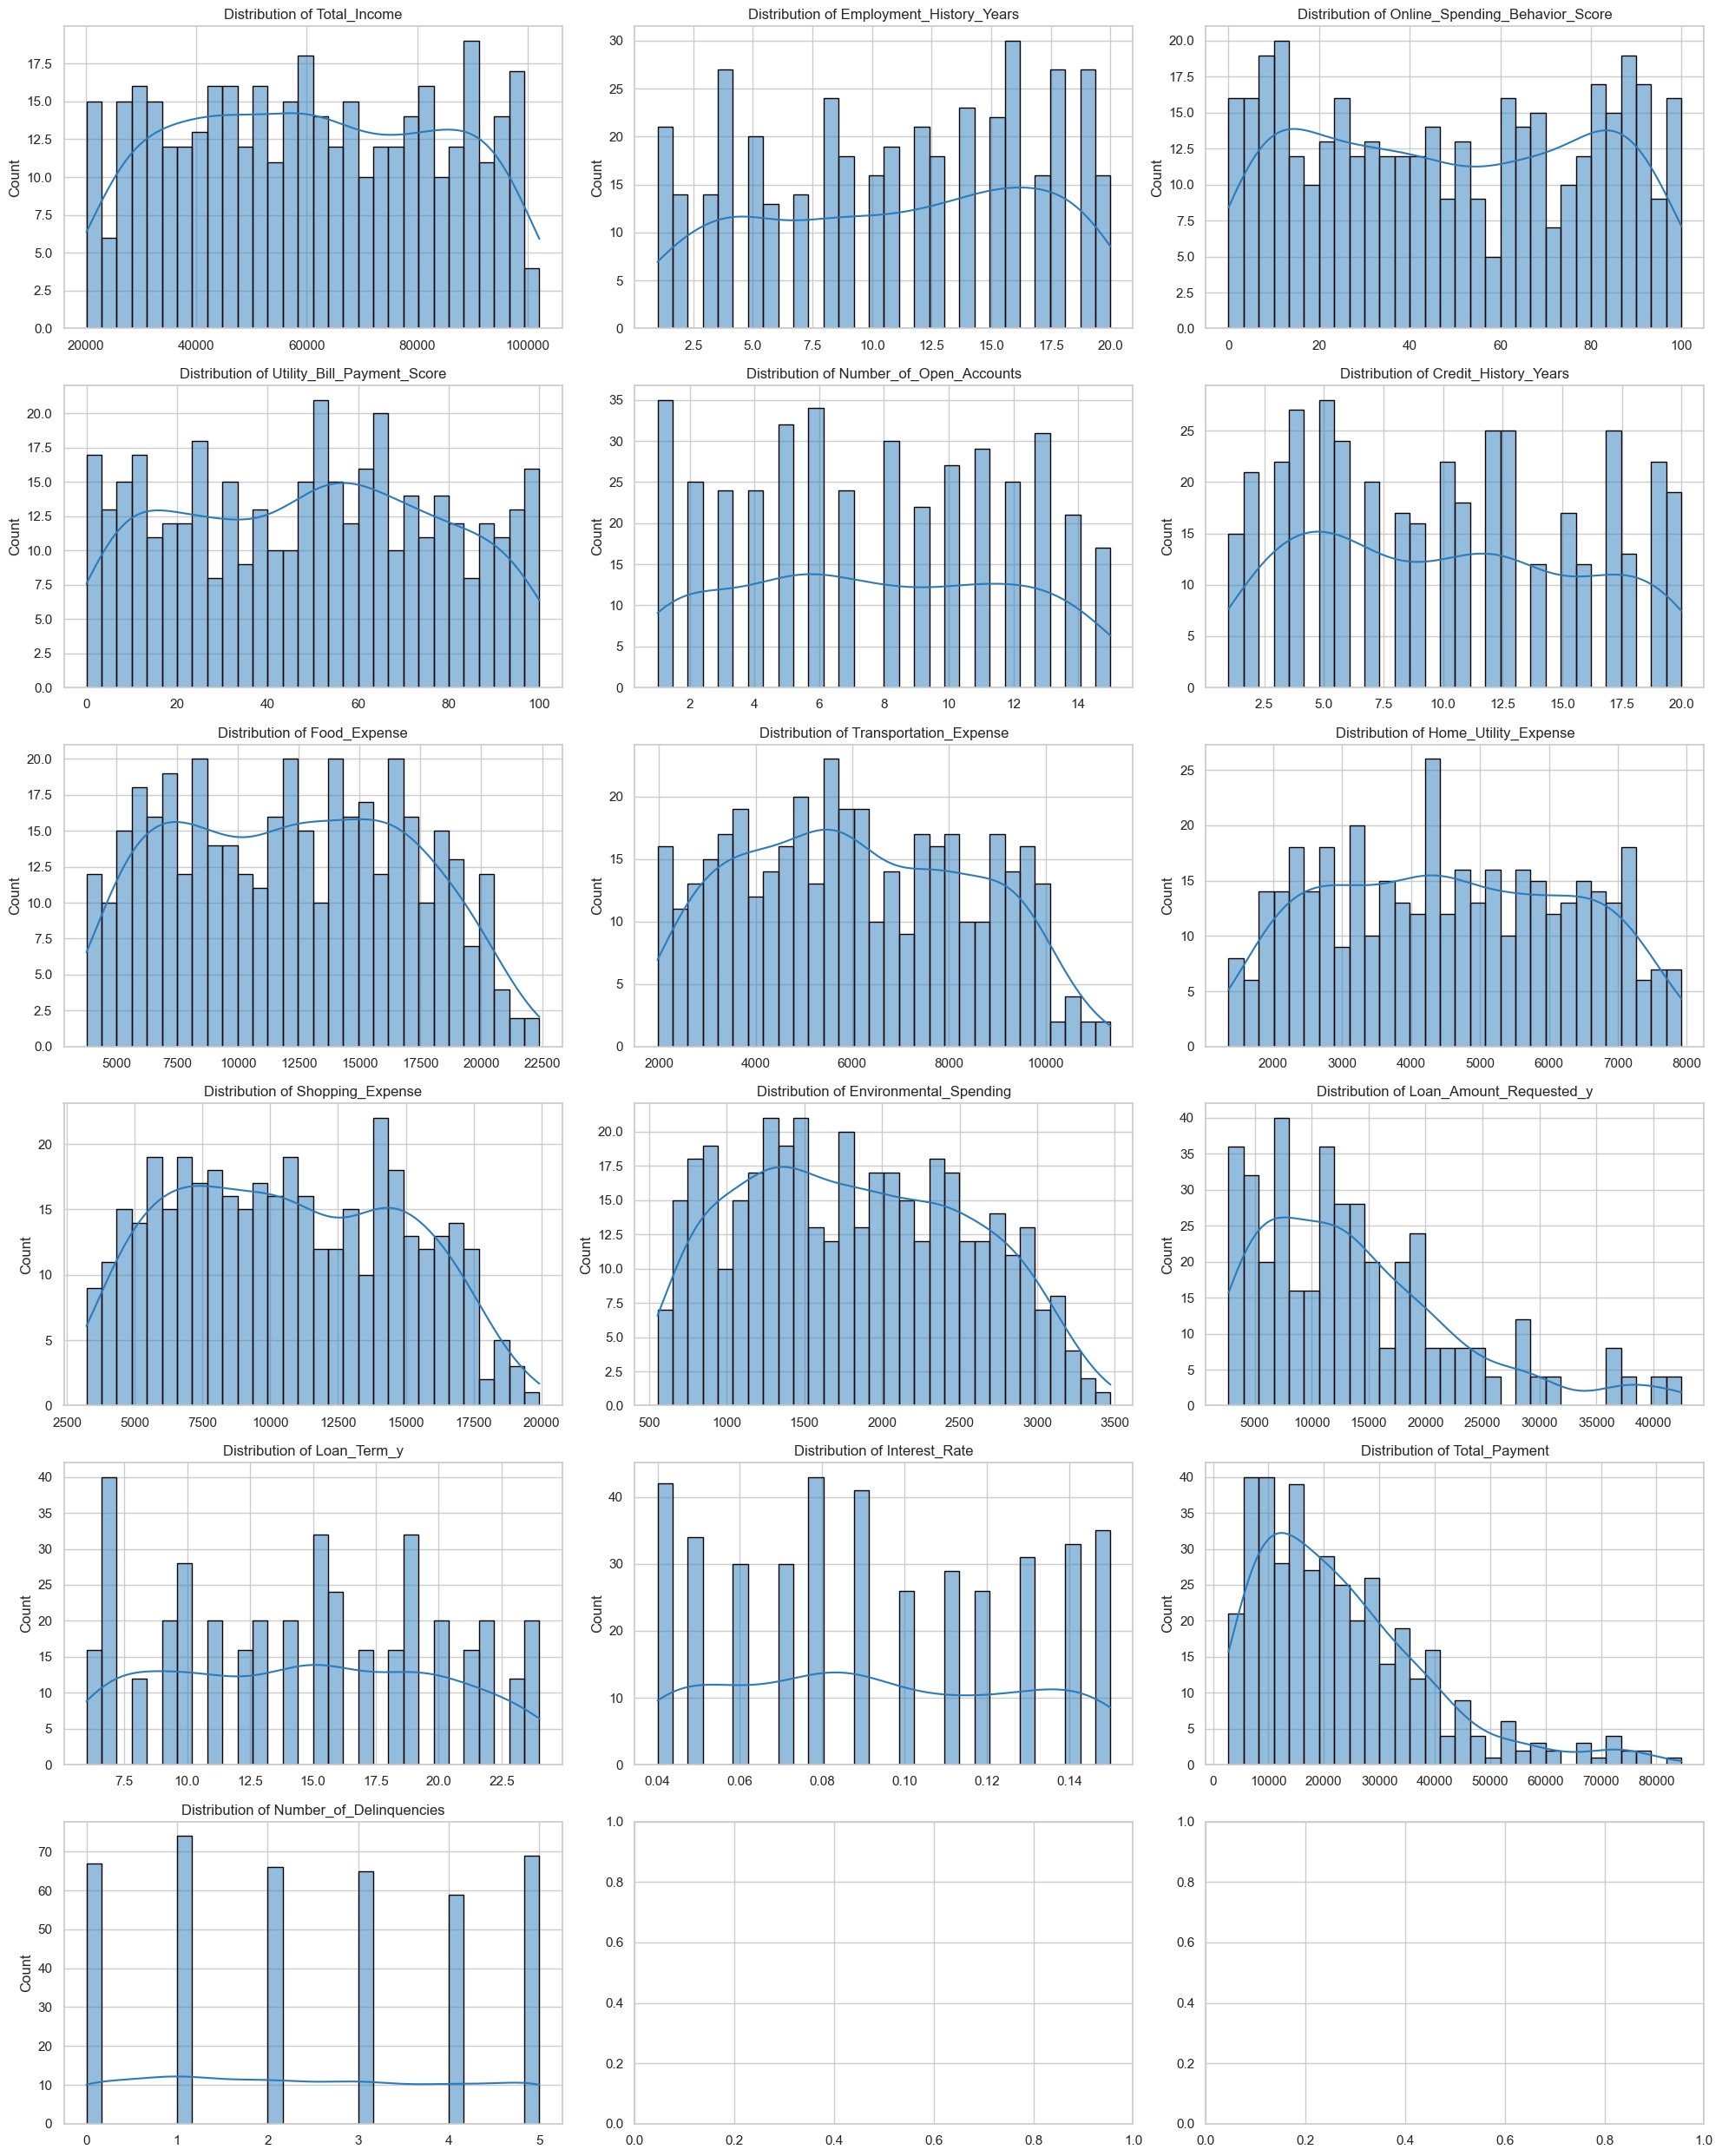

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Select relevant columns for visualization
columns_to_use = [
    'Total_Income','Employment_History_Years',
    'Online_Spending_Behavior_Score', 'Utility_Bill_Payment_Score',
    'Number_of_Open_Accounts', 'Credit_History_Years', 'Food_Expense',
    'Transportation_Expense', 'Home_Utility_Expense', 'Shopping_Expense',
    'Environmental_Spending', 'Loan_Amount_Requested_y', 'Loan_Term_y',
    'Interest_Rate', 'Total_Payment', 'Number_of_Delinquencies'
]

# Set up the plot grid
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 25))
axes = axes.flatten()

# Define a professional color
color = sns.color_palette("Blues")[4]

# Plot histograms with KDE
for i, col in enumerate(columns_to_use):
    sns.histplot(data=df_cleaned, x=col, ax=axes[i], kde=True, bins=30, color=color, edgecolor="black")
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()


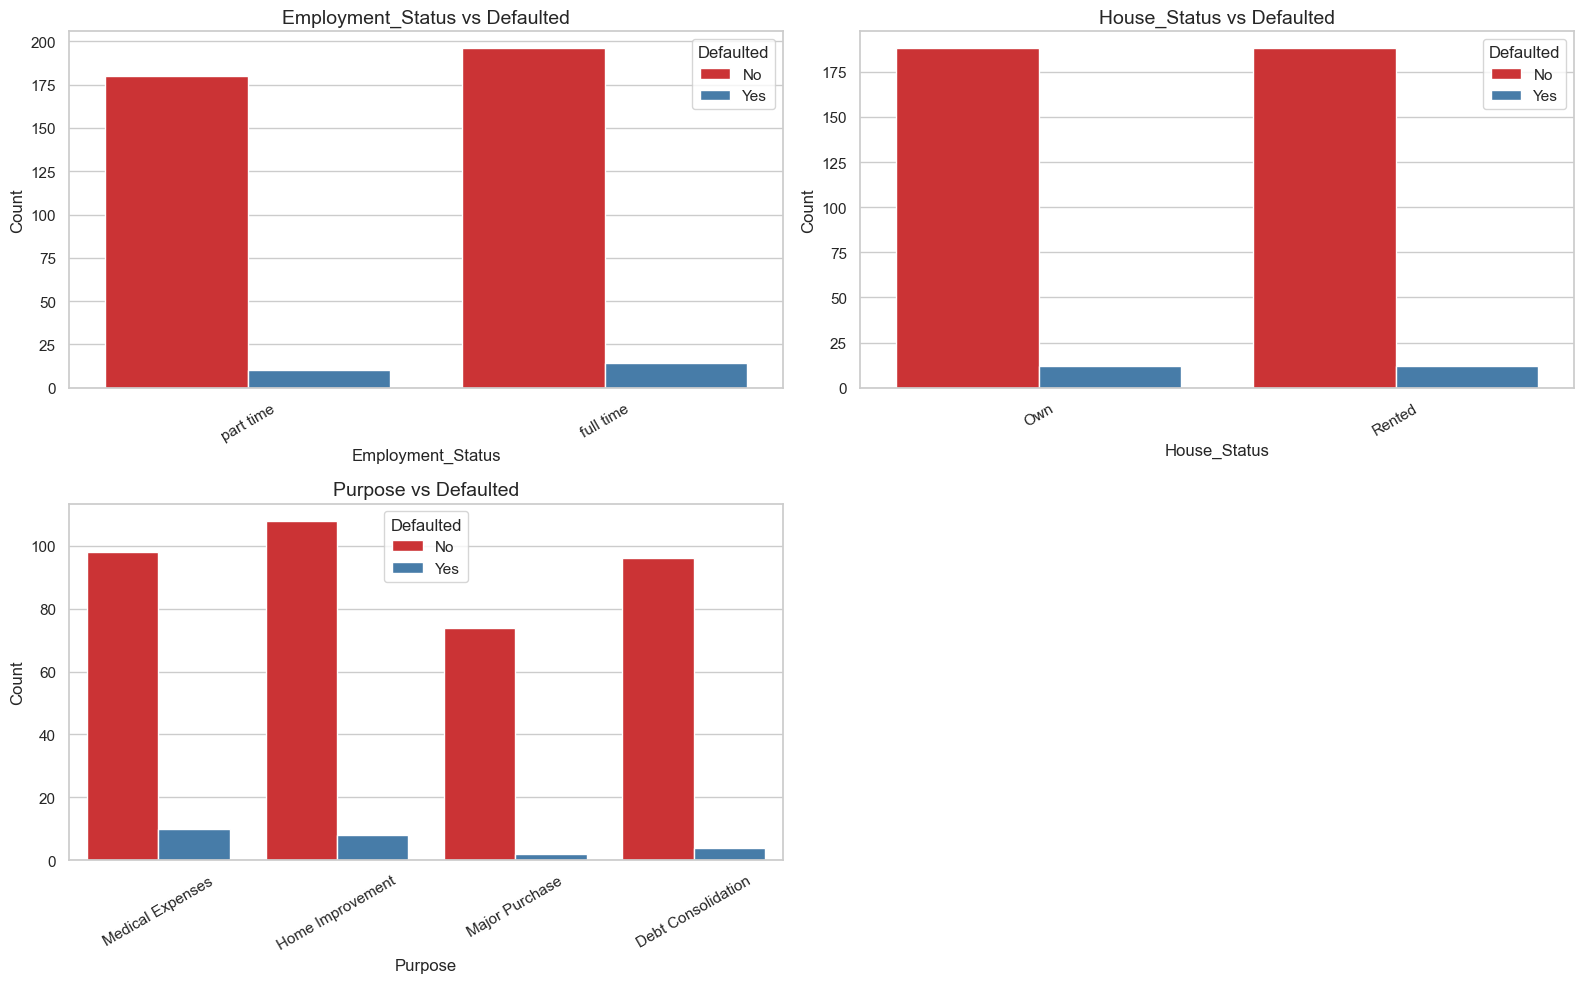

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['Employment_Status', 'House_Status', 'Purpose']

plt.figure(figsize=(16, 10))
for i, var in enumerate(categorical_vars):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df_cleaned, x=var, hue='Defaulted', palette='Set1')
    plt.title(f'{var} vs Defaulted', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.legend(title='Defaulted', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


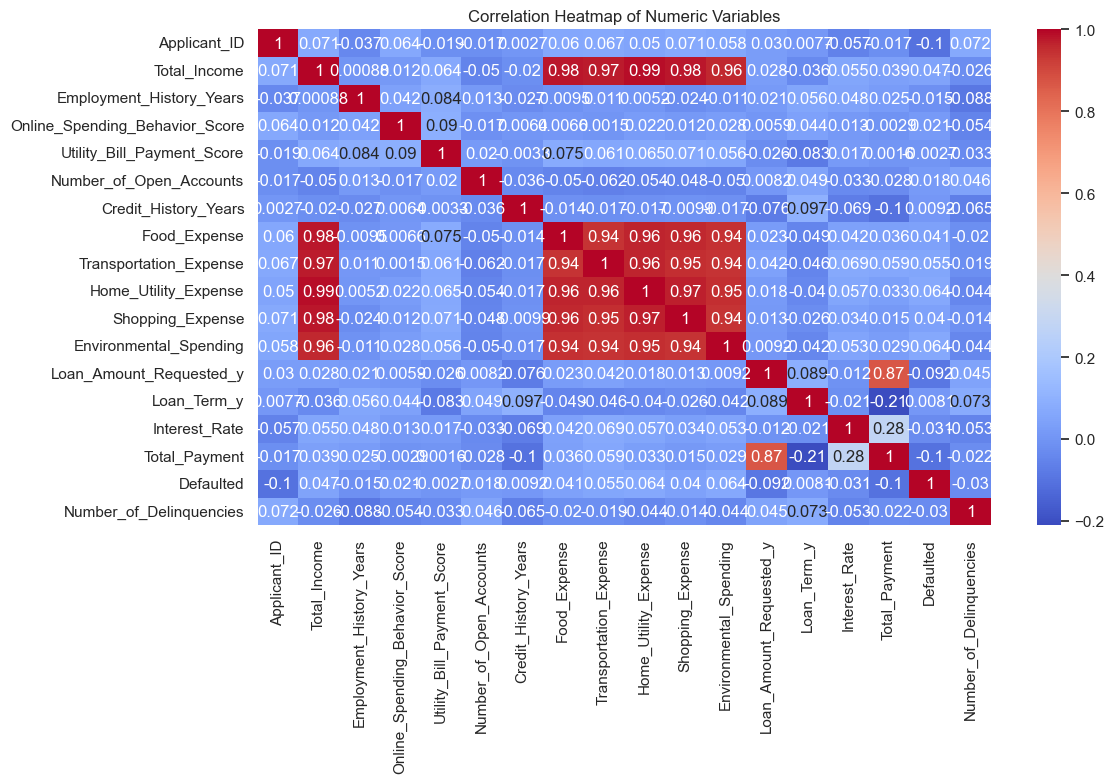

In [15]:

# Select only numeric columns
numeric_df = df_cleaned.select_dtypes(include='number')

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()


In [16]:
# Select only numerical columns
numeric_cols = df_cleaned.select_dtypes(include='number').columns

# Dictionary to store outlier counts per column
outlier_counts = {}

# Loop through each numerical column and apply IQR method
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    
    # Store count
    outlier_counts[col] = len(outliers)

# Print outlier count summary
print("Outlier counts for numerical variables:\n")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")


Outlier counts for numerical variables:

Applicant_ID: 0
Total_Income: 0
Employment_History_Years: 0
Online_Spending_Behavior_Score: 0
Utility_Bill_Payment_Score: 0
Number_of_Open_Accounts: 0
Credit_History_Years: 0
Food_Expense: 0
Transportation_Expense: 0
Home_Utility_Expense: 0
Shopping_Expense: 0
Environmental_Spending: 0
Loan_Amount_Requested_y: 20
Loan_Term_y: 0
Interest_Rate: 0
Total_Payment: 14
Defaulted: 24
Number_of_Delinquencies: 0


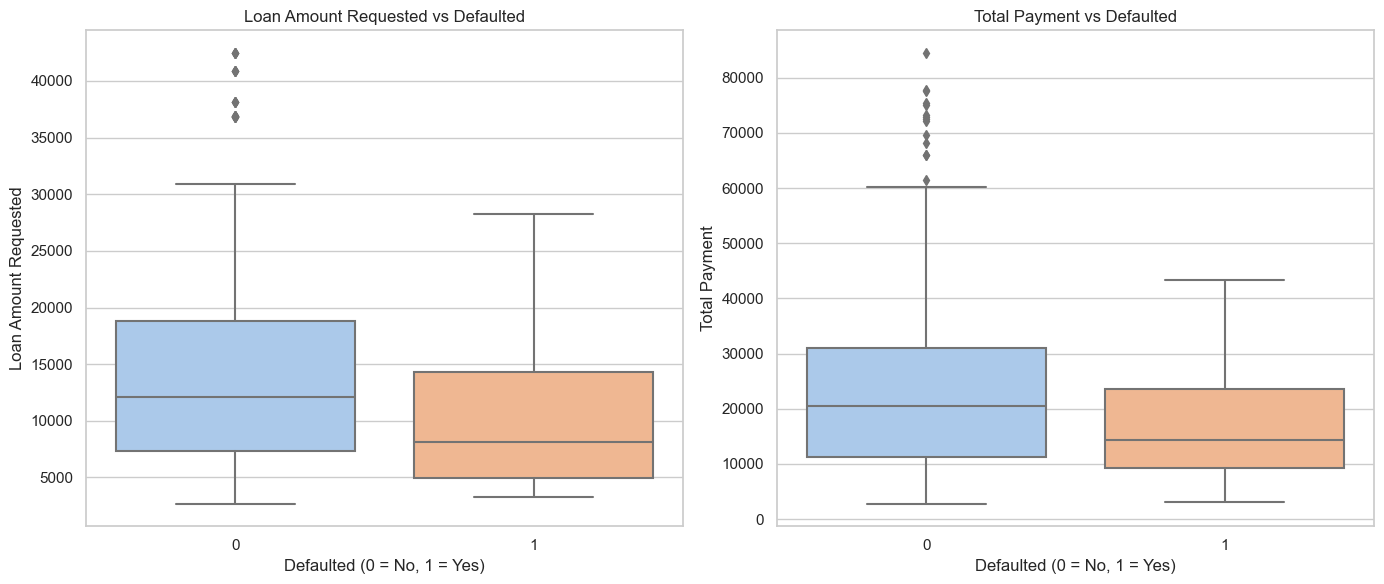

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Boxplot for Loan Amount Requested by Defaulted
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned, x='Defaulted', y='Loan_Amount_Requested_y', palette='pastel')
plt.title('Loan Amount Requested vs Defaulted')
plt.xlabel('Defaulted (0 = No, 1 = Yes)')
plt.ylabel('Loan Amount Requested')

# Boxplot for Total Payment by Defaulted
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned, x='Defaulted', y='Total_Payment', palette='pastel')
plt.title('Total Payment vs Defaulted')
plt.xlabel('Defaulted (0 = No, 1 = Yes)')
plt.ylabel('Total Payment')

# Display the plots
plt.tight_layout()
plt.show()


In [18]:
# Define expense columns
expense_columns = [
    'Food_Expense',
    'Transportation_Expense',
    'Home_Utility_Expense',
    'Shopping_Expense',
    'Environmental_Spending'
]

# Create Total_Consumption column
df_cleaned['Total_Consumption'] = df_cleaned[expense_columns].sum(axis=1)



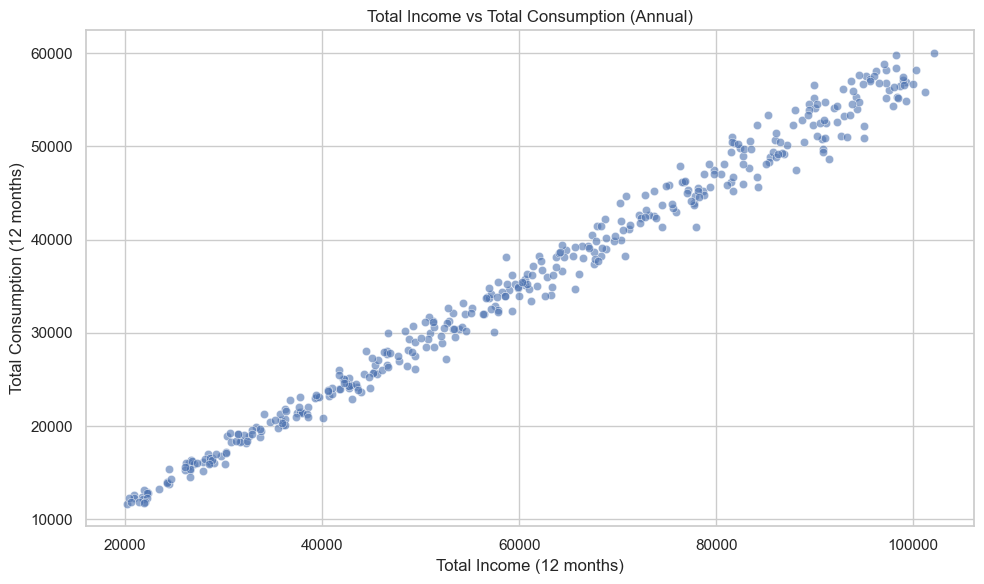

Pearson Correlation Coefficient (r): 0.9945
P-value: 0.0000


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# STEP 1: Define the columns
income_var = 'Total_Income'
consumption_var = 'Total_Consumption'

# STEP 2: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned[income_var], y=df_cleaned[consumption_var], alpha=0.6)
plt.title('Total Income vs Total Consumption (Annual)')
plt.xlabel('Total Income (12 months)')
plt.ylabel('Total Consumption (12 months)')
plt.tight_layout()
plt.show()

# STEP 3: Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(df_cleaned[income_var], df_cleaned[consumption_var])

# STEP 4: Print results
print(f"Pearson Correlation Coefficient (r): {correlation:.4f}")
print(f"P-value: {p_value:.4f}")


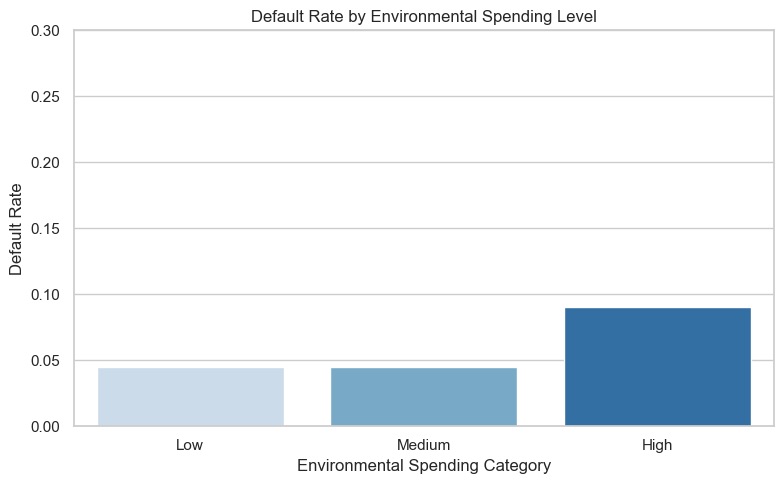

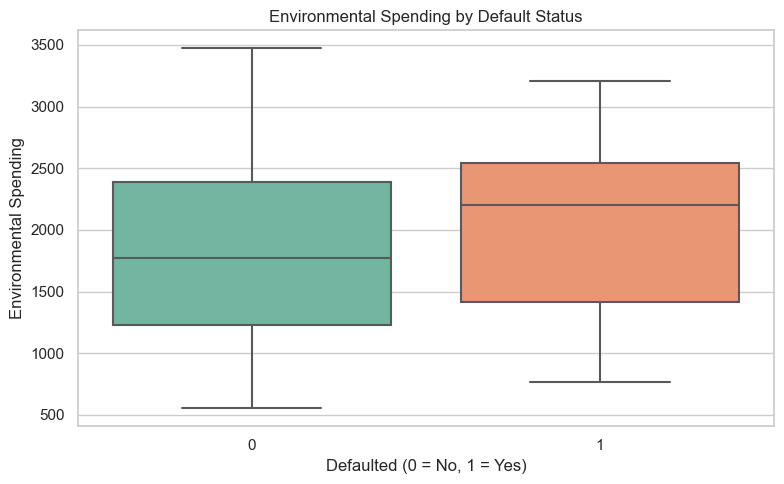

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create quantile-based categories for Environmental Spending
df_cleaned['Env_Spend_Level'] = pd.qcut(
    df_cleaned['Environmental_Spending'], q=3, labels=['Low', 'Medium', 'High']
)

# Calculate default rates by environmental spending level
default_rates = df_cleaned.groupby('Env_Spend_Level')['Defaulted'].mean().reset_index()

# ---- BAR PLOT: Default Rate by Environmental Spending Level ----
plt.figure(figsize=(8, 5))
sns.barplot(data=default_rates, x='Env_Spend_Level', y='Defaulted', palette='Blues')
plt.title('Default Rate by Environmental Spending Level')
plt.xlabel('Environmental Spending Category')
plt.ylabel('Default Rate')
plt.ylim(0, 0.3)
plt.tight_layout()
plt.show()

# ---- BOX PLOT: Environmental Spending by Defaulted Status ----
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x='Defaulted', y='Environmental_Spending', palette='Set2')
plt.title('Environmental Spending by Default Status')
plt.xlabel('Defaulted (0 = No, 1 = Yes)')
plt.ylabel('Environmental Spending')
plt.tight_layout()
plt.show()


In [21]:
# Select only numeric columns
numeric_df = df_cleaned.select_dtypes(include='number')

# Compute correlation of each numeric variable with 'Defaulted'
correlation_with_defaulted = numeric_df.corr()['Defaulted'].drop('Defaulted')

# Display the result
correlation_with_defaulted.sort_values(ascending=False)


Home_Utility_Expense              0.064085
Environmental_Spending            0.063858
Transportation_Expense            0.054585
Total_Consumption                 0.048052
Total_Income                      0.047305
Food_Expense                      0.041306
Shopping_Expense                  0.039936
Online_Spending_Behavior_Score    0.020564
Number_of_Open_Accounts           0.017820
Credit_History_Years              0.009204
Loan_Term_y                       0.008068
Utility_Bill_Payment_Score       -0.002742
Employment_History_Years         -0.015342
Number_of_Delinquencies          -0.030139
Interest_Rate                    -0.030892
Loan_Amount_Requested_y          -0.092415
Total_Payment                    -0.102461
Applicant_ID                     -0.103801
Name: Defaulted, dtype: float64

In [22]:
# Step 1: Select the categorical columns you want to encode
categorical_vars = ['Employment_Status', 'House_Status', 'Purpose', 'Approval_Status']

# Step 2: Apply one-hot encoding using pandas
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_vars, drop_first=True)

# Convert all boolean columns to integers (0 and 1)
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes('bool').columns})

# Step 3: Display the encoded DataFrame shape and preview
print("Shape after encoding:", df_encoded.shape)
df_encoded.info()



Shape after encoding: (400, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Applicant_ID                    400 non-null    int64   
 1   Total_Income                    400 non-null    float64 
 2   Employment_History_Years        400 non-null    int64   
 3   Online_Spending_Behavior_Score  400 non-null    int64   
 4   Utility_Bill_Payment_Score      400 non-null    int64   
 5   Number_of_Open_Accounts         400 non-null    int64   
 6   Credit_History_Years            400 non-null    int64   
 7   Food_Expense                    400 non-null    float64 
 8   Transportation_Expense          400 non-null    float64 
 9   Home_Utility_Expense            400 non-null    float64 
 10  Shopping_Expense                400 non-null    float64 
 11  Environmental_Spending          400 non-null    floa

In [23]:
# List of binned variables
binned_vars = [
    'Employment_History_Bin',
    'Online_Spending_Behavior_Bin',
    'Utility_Bill_Payment_Bin',
    'Open_Accounts_Bin',
    'Credit_History_Bin'
]

# One-hot encode the binned variables with integer dtype
df_encoded_1 = pd.get_dummies(df_binned, columns=binned_vars, drop_first=True, dtype=int)


In [24]:
df_encoded_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Applicant_ID                         400 non-null    int64  
 1   Total_Income                         400 non-null    float64
 2   Employment_Status                    400 non-null    object 
 3   House_Status                         400 non-null    object 
 4   Employment_History_Years             400 non-null    int64  
 5   Online_Spending_Behavior_Score       400 non-null    int64  
 6   Utility_Bill_Payment_Score           400 non-null    int64  
 7   Number_of_Open_Accounts              400 non-null    int64  
 8   Credit_History_Years                 400 non-null    int64  
 9   Food_Expense                         400 non-null    float64
 10  Transportation_Expense               400 non-null    float64
 11  Home_Utility_Expense            

In [26]:
import pandas as pd

# Assuming df_encoded is your existing DataFrame
# and df_binned contains the binned columns

# List of binned columns to add
binned_columns = [
    'Employment_History_Bin_Medium',
    'Employment_History_Bin_High',
    'Online_Spending_Behavior_Bin_Medium',
    'Online_Spending_Behavior_Bin_High',
    'Utility_Bill_Payment_Bin_Medium',
    'Utility_Bill_Payment_Bin_High',
    'Open_Accounts_Bin_Medium',
    'Open_Accounts_Bin_High',
    'Credit_History_Bin_Medium',
    'Credit_History_Bin_High'
]

# Concatenate the binned columns to df_encoded
df_encoded = pd.concat([df_encoded, df_encoded_1[binned_columns]], axis=1)


In [27]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Applicant_ID                         400 non-null    int64   
 1   Total_Income                         400 non-null    float64 
 2   Employment_History_Years             400 non-null    int64   
 3   Online_Spending_Behavior_Score       400 non-null    int64   
 4   Utility_Bill_Payment_Score           400 non-null    int64   
 5   Number_of_Open_Accounts              400 non-null    int64   
 6   Credit_History_Years                 400 non-null    int64   
 7   Food_Expense                         400 non-null    float64 
 8   Transportation_Expense               400 non-null    float64 
 9   Home_Utility_Expense                 400 non-null    float64 
 10  Shopping_Expense                     400 non-null    float64 
 11  Environmental_Spend

In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef

# Assuming df_encoded is your DataFrame with the encoded variables
# and 'Defaulted' is your binary target variable

# List of one-hot encoded variables to analyze
binary_vars = [
    'Purpose_Major Purchase',
    'Purpose_Home Improvement',
    'Purpose_Medical Expenses',
    'Employment_Status_part time',
    'House_Status_Rented',
    'Employment_History_Bin_Medium',
    'Employment_History_Bin_High',
    'Online_Spending_Behavior_Bin_Medium',
    'Online_Spending_Behavior_Bin_High',
    'Utility_Bill_Payment_Bin_Medium',
    'Utility_Bill_Payment_Bin_High',
    'Open_Accounts_Bin_Medium',
    'Open_Accounts_Bin_High',
    'Credit_History_Bin_Medium',
    'Credit_History_Bin_High'
]

# Initialize a dictionary to store Phi coefficients
phi_coefficients = {}

# Calculate Phi coefficient for each variable
for var in binary_vars:
    phi = matthews_corrcoef(df_encoded[var], df_encoded['Defaulted'])
    phi_coefficients[var] = phi

# Convert the dictionary to a DataFrame for better visualization
phi_df = pd.DataFrame.from_dict(phi_coefficients, orient='index', columns=['Phi Coefficient'])

# Sort the DataFrame by the absolute value of the Phi coefficient
phi_df['Abs_Phi'] = phi_df['Phi Coefficient'].abs()
phi_df = phi_df.sort_values(by='Abs_Phi', ascending=False).drop(columns='Abs_Phi')

# Display the Phi coefficients
print(phi_df)


                                     Phi Coefficient
Open_Accounts_Bin_Medium                    0.107801
Purpose_Medical Expenses                    0.083464
Purpose_Major Purchase                     -0.068694
Online_Spending_Behavior_Bin_Medium        -0.061899
Employment_History_Bin_High                -0.055348
Online_Spending_Behavior_Bin_High           0.053544
Open_Accounts_Bin_High                     -0.040717
Employment_Status_part time                -0.029512
Credit_History_Bin_Medium                   0.026112
Purpose_Home Improvement                    0.024127
Utility_Bill_Payment_Bin_Medium            -0.022317
Employment_History_Bin_Medium               0.014742
Credit_History_Bin_High                    -0.011551
Utility_Bill_Payment_Bin_High               0.004421
House_Status_Rented                         0.000000


In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Step 1: Define the selected features
selected_features = [
    'Home_Utility_Expense',
    'Environmental_Spending',
    'Transportation_Expense',
    'Loan_Amount_Requested_y',
    'Employment_Status_part time',
    'House_Status_Rented',
    'Purpose_Home Improvement',
    'Purpose_Major Purchase',
    'Purpose_Medical Expenses',
    'Online_Spending_Behavior_Bin_Medium',
    'Online_Spending_Behavior_Bin_High',
    'Employment_History_Bin_High'
]

# Step 2: Prepare the feature matrix (X) and target vector (y)
X = df_encoded[selected_features]
y = df_encoded['Defaulted']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Standardize the numerical features
numeric_features = [
    'Home_Utility_Expense',
    'Environmental_Spending',
    'Transportation_Expense',
    'Loan_Amount_Requested_y'
]

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Step 5: Initialize and train the logistic regression model
model_c = LogisticRegression()
model_c.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model_c.predict(X_test)
y_prob = model_c.predict_proba(X_test)[:, 1]

# Step 7: Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Step 8: Display the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC-AUC Score_model_c: {roc_auc:.4f}")

# Step 9: Analyze feature importance
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model_c.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients:")
print(coefficients)


Confusion Matrix:
[[113   0]
 [  7   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       113
           1       0.00      0.00      0.00         7

    accuracy                           0.94       120
   macro avg       0.47      0.50      0.48       120
weighted avg       0.89      0.94      0.91       120

ROC-AUC Score_model_c: 0.6852

Feature Coefficients:
                                Feature  Coefficient
9   Online_Spending_Behavior_Bin_Medium    -0.729649
3               Loan_Amount_Requested_y    -0.454454
7                Purpose_Major Purchase    -0.380660
0                  Home_Utility_Expense     0.341048
6              Purpose_Home Improvement     0.273125
11          Employment_History_Bin_High    -0.240960
10    Online_Spending_Behavior_Bin_High     0.202941
8              Purpose_Medical Expenses     0.162326
4           Employment_Status_part time    -0.141201
1                Environm

/Users/mikhilsuvarna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mikhilsuvarna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mikhilsuvarna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Step 1: Define the selected features
selected_features = [
    'Home_Utility_Expense',
    'Environmental_Spending',
    'Transportation_Expense',
    'Loan_Amount_Requested_y',
    'Employment_Status_part time',
    'House_Status_Rented',
    'Purpose_Home Improvement',
    'Purpose_Major Purchase',
    'Purpose_Medical Expenses',
    'Online_Spending_Behavior_Bin_Medium',
    'Online_Spending_Behavior_Bin_High',
    'Employment_History_Bin_High'
]

# Step 2: Prepare the feature matrix (X) and target vector (y)
X = df_encoded[selected_features]
y = df_encoded['Defaulted']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Standardize the numerical features
numeric_features = [
    'Home_Utility_Expense',
    'Environmental_Spending',
    'Transportation_Expense',
    'Loan_Amount_Requested_y'
]

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Step 5: Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 7: Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Step 8: Display the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Step 9: Analyze feature importance
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients:")
print(coefficients)


Confusion Matrix:
[[113   0]
 [  7   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       113
           1       0.00      0.00      0.00         7

    accuracy                           0.94       120
   macro avg       0.47      0.50      0.48       120
weighted avg       0.89      0.94      0.91       120

ROC-AUC Score: 0.6852

Feature Coefficients:
                                Feature  Coefficient
9   Online_Spending_Behavior_Bin_Medium    -0.729649
3               Loan_Amount_Requested_y    -0.454454
7                Purpose_Major Purchase    -0.380660
0                  Home_Utility_Expense     0.341048
6              Purpose_Home Improvement     0.273125
11          Employment_History_Bin_High    -0.240960
10    Online_Spending_Behavior_Bin_High     0.202941
8              Purpose_Medical Expenses     0.162326
4           Employment_Status_part time    -0.141201
1                Environmental_Sp

/Users/mikhilsuvarna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mikhilsuvarna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mikhilsuvarna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Step 1: Define the selected features
selected_features = [
    'Home_Utility_Expense',
    'Environmental_Spending',
    'Transportation_Expense',
    'Total_Income',
    'Food_Expense',
    'Loan_Amount_Requested_y',
    'Employment_Status_part time',
    'House_Status_Rented',
    'Purpose_Home Improvement',
    'Purpose_Major Purchase',
    'Purpose_Medical Expenses'
]

# Step 2: Prepare the feature matrix (X) and target vector (y)
X = df_encoded[selected_features]
y = df_encoded['Defaulted']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Standardize the numerical features
numeric_features = [
    'Home_Utility_Expense',
    'Environmental_Spending',
    'Transportation_Expense',
    'Total_Income',
    'Food_Expense',
    'Loan_Amount_Requested_y'
]

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Step 5: Initialize and train the logistic regression model
model_a = LogisticRegression()
model_a.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model_a.predict(X_test)
y_prob = model_a.predict_proba(X_test)[:, 1]

# Step 7: Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Step 8: Display the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC-AUC Score_model_a: {roc_auc:.4f}")

# Step 9: Analyze feature importance
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model_a.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients:")
print(coefficients)


Confusion Matrix:
[[113   0]
 [  7   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       113
           1       0.00      0.00      0.00         7

    accuracy                           0.94       120
   macro avg       0.47      0.50      0.48       120
weighted avg       0.89      0.94      0.91       120

ROC-AUC Score_model_a: 0.7750

Feature Coefficients:
                        Feature  Coefficient
0          Home_Utility_Expense     0.606743
5       Loan_Amount_Requested_y    -0.433029
4                  Food_Expense    -0.326629
9        Purpose_Major Purchase    -0.317942
3                  Total_Income    -0.283148
8      Purpose_Home Improvement     0.261535
10     Purpose_Medical Expenses     0.199433
1        Environmental_Spending     0.179991
6   Employment_Status_part time    -0.102433
2        Transportation_Expense     0.059417
7           House_Status_Rented     0.053495


/Users/mikhilsuvarna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mikhilsuvarna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mikhilsuvarna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Step 1: Define the selected features
selected_features = [
    'Home_Utility_Expense',
    'Environmental_Spending',
    'Transportation_Expense',
    'Total_Income',
    'Food_Expense',
    'Loan_Amount_Requested_y',
    'Purpose_Major Purchase',
    'Purpose_Medical Expenses'
]

# Step 2: Prepare the feature matrix (X) and target vector (y)
X = df_encoded[selected_features]
y = df_encoded['Defaulted']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Standardize the numerical features
numeric_features = [
    'Home_Utility_Expense',
    'Environmental_Spending',
    'Transportation_Expense',
    'Total_Income',
    'Food_Expense',
    'Loan_Amount_Requested_y'
]

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Step 5: Initialize and train the logistic regression model
model_b = LogisticRegression()
model_b.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model_b.predict(X_test)
y_prob = model_b.predict_proba(X_test)[:, 1]

# Step 7: Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Step 8: Display the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC-AUC Score_model_b: {roc_auc:.4f}")

# Step 9: Analyze feature importance
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model_b.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients:")
print(coefficients)


Confusion Matrix:
[[113   0]
 [  7   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       113
           1       0.00      0.00      0.00         7

    accuracy                           0.94       120
   macro avg       0.47      0.50      0.48       120
weighted avg       0.89      0.94      0.91       120

ROC-AUC Score_model_b: 0.7497

Feature Coefficients:
                    Feature  Coefficient
0      Home_Utility_Expense     0.597125
5   Loan_Amount_Requested_y    -0.437296
6    Purpose_Major Purchase    -0.402690
4              Food_Expense    -0.315517
3              Total_Income    -0.299402
1    Environmental_Spending     0.189756
7  Purpose_Medical Expenses     0.104472
2    Transportation_Expense     0.057453


/Users/mikhilsuvarna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mikhilsuvarna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mikhilsuvarna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Features for Model A
features_a = [
    'Home_Utility_Expense',
    'Environmental_Spending',
    'Transportation_Expense',
    'Total_Income',
    'Food_Expense',
    'Loan_Amount_Requested_y',
    'Employment_Status_part time',
    'House_Status_Rented',
    'Purpose_Home Improvement',
    'Purpose_Major Purchase',
    'Purpose_Medical Expenses'
]

# Features for Model B
features_b = [
    'Home_Utility_Expense',
    'Environmental_Spending',
    'Transportation_Expense',
    'Total_Income',
    'Food_Expense',
    'Loan_Amount_Requested_y',
    'Purpose_Major Purchase',
    'Purpose_Medical Expenses'
]

# Features for Model C
features_c = [
    'Home_Utility_Expense',
    'Environmental_Spending',
    'Transportation_Expense',
    'Loan_Amount_Requested_y',
    'Employment_Status_part time',
    'House_Status_Rented',
    'Purpose_Home Improvement',
    'Purpose_Major Purchase',
    'Purpose_Medical Expenses',
    'Online_Spending_Behavior_Bin_Medium',
    'Online_Spending_Behavior_Bin_High',
    'Employment_History_Bin_High'
]


In [37]:
from sklearn.model_selection import train_test_split

# Define the target variable
y = df_encoded['Defaulted']

# Perform a single train-test split
X_train_full, X_test_full, y_train, y_test = train_test_split(
    df_encoded, y, test_size=0.3, random_state=42, stratify=y
)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Function to train a logistic regression model
def train_model(features, model_name):
    # Select features for training and testing
    X_train = X_train_full[features].copy()
    X_test = X_test_full[features].copy()

    # Identify numeric features for scaling
    numeric_features = [
        'Home_Utility_Expense',
        'Environmental_Spending',
        'Transportation_Expense',
        'Total_Income',
        'Food_Expense',
        'Loan_Amount_Requested_y'
    ]
    numeric_features = [feature for feature in numeric_features if feature in features]

    # Apply standard scaling to numeric features
    scaler = StandardScaler()
    X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
    X_test[numeric_features] = scaler.transform(X_test[numeric_features])

    # Initialize and train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Store the trained model and test data
    return model, X_test

# Train Model A
model_a, X_test_a = train_model(features_a, 'Model A')

# Train Model B
model_b, X_test_b = train_model(features_b, 'Model B')

# Train Model C
model_c, X_test_c = train_model(features_c, 'Model C')


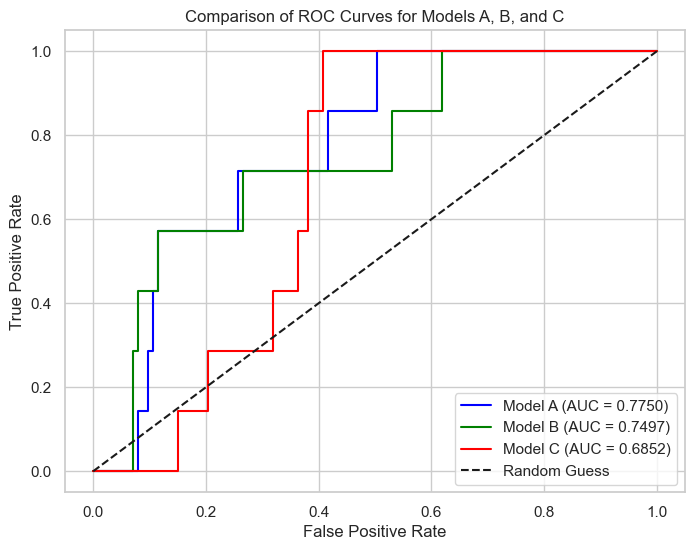

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities and ROC metrics for Model A
y_prob_a = model_a.predict_proba(X_test_a)[:, 1]
fpr_a, tpr_a, _ = roc_curve(y_test, y_prob_a)
auc_a = roc_auc_score(y_test, y_prob_a)

# Compute probabilities and ROC metrics for Model B
y_prob_b = model_b.predict_proba(X_test_b)[:, 1]
fpr_b, tpr_b, _ = roc_curve(y_test, y_prob_b)
auc_b = roc_auc_score(y_test, y_prob_b)

# Compute probabilities and ROC metrics for Model C
y_prob_c = model_c.predict_proba(X_test_c)[:, 1]
fpr_c, tpr_c, _ = roc_curve(y_test, y_prob_c)
auc_c = roc_auc_score(y_test, y_prob_c)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_a, tpr_a, label=f'Model A (AUC = {auc_a:.4f})', color='blue')
plt.plot(fpr_b, tpr_b, label=f'Model B (AUC = {auc_b:.4f})', color='green')
plt.plot(fpr_c, tpr_c, label=f'Model C (AUC = {auc_c:.4f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves for Models A, B, and C')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [41]:
#### df_2= descriptive_Statistics_2
df_encoded.to_csv('df_encoded.csv', index=False)

Here's why Model C’s ROC curve is above the others at higher True Positive Rates (TPR > 0.6) despite its lower AUC:

1. AUC Measures Overall Performance:
AUC (Area Under Curve) evaluates the entire ROC curve, not just one section.

Even though Model C performs well in the high TPR range, it performs poorly in the low TPR range, particularly early on (you can see the curve near the diagonal for the first ~0.4 FPR), which pulls its overall AUC down.

2. Model C Is More Aggressive:
Model C (red line) may have a lower threshold for classifying positives, leading to higher sensitivity (TPR) but at the cost of more false positives.

That’s why its curve stays higher in the upper TPR range — it captures more true positives — but it also accumulates false positives earlier.

3. Model A and B Are More Balanced:
Their curves rise more gradually and manage the trade-off between true and false positives better across the full range of thresholds.

Summary:
Model C is better at maximizing recall in high TPR regions but sacrifices precision and specificity.

If your use case prioritizes capturing as many positives as possible, even at the cost of more false alarms (e.g., in medical screening), Model C might be viable.

But for balanced performance, Model A is better.